(EJUCOINTCIECOPI)=

# 3.3 Ejemplos de problemas UCO, introducción a *Constrained Inequality and Equality Optimization* (CIEO) y puntos interiores

```{admonition} Notas para contenedor de docker:

Comando de docker para ejecución de la nota de forma local:

nota: cambiar `<ruta a mi directorio>` por la ruta de directorio que se desea mapear a `/datos` dentro del contenedor de docker.

`docker run --rm -v <ruta a mi directorio>:/datos --name jupyterlab_optimizacion -p 8888:8888 -d palmoreck/jupyterlab_optimizacion:2.1.4`

password para jupyterlab: `qwerty`

Detener el contenedor de docker:

`docker stop jupyterlab_optimizacion`

Documentación de la imagen de docker `palmoreck/jupyterlab_optimizacion:2.1.4` en [liga](https://github.com/palmoreck/dockerfiles/tree/master/jupyterlab/optimizacion).

```

---

Nota generada a partir de [liga1](https://www.dropbox.com/s/6isby5h1e5f2yzs/4.2.Problemas_de_optimizacion_convexa.pdf?dl=0), [liga2](https://drive.google.com/file/d/1zCIHNAxe5Shc36Qo0XjehHgwrafKSJ_t/view), [liga3](https://drive.google.com/file/d/12L7rOCgW7NEKl_xJbIGZz05XXVrOaPBz/view), [liga4](https://drive.google.com/file/d/1RMwUXEN_SOHKue-J9Cx3Ldvj9bejLjiM/view).

```{admonition} Al final de esta nota el y la lectora:
:class: tip

* 

* 

```

## Mínimos cuadrados

Obsérvese que hay una gran cantidad de modelos por mínimos cuadrados, por ejemplo:

* [Lineales](https://en.wikipedia.org/wiki/Linear_least_squares) u [ordinarios](https://en.wikipedia.org/wiki/Ordinary_least_squares) (nombre más usado en Estadística y Econometría).

* [Generalizados](https://en.wikipedia.org/wiki/Generalized_least_squares), [ponderados](https://en.wikipedia.org/wiki/Weighted_least_squares).

* [No lineales](https://en.wikipedia.org/wiki/Non-linear_least_squares).

* [Totales](https://en.wikipedia.org/wiki/Total_least_squares) y [parciales](https://en.wikipedia.org/wiki/Partial_least_squares_regression).

* [No negativos](https://en.wikipedia.org/wiki/Non-negative_least_squares).

* [Rango reducido](https://epubs.siam.org/doi/abs/10.1137/1.9780898718867.ch7).


## Mínimos cuadrados lineales

Se **asume** en esta sección que $A \in \mathbb{R}^{m \times n}$ con $m \geq n$ (más renglones que columnas en $A$).


Cada uno de los modelos anteriores tienen diversas aplicaciones y propósitos. Los lineales son un caso particular del problema más general de **aproximación por normas**:

$$\displaystyle \min_{x \in \mathbb{R}^n} ||Ax-b||$$

donde: $A \in \mathbb{R}^{m \times n}$, $b \in \mathbb{R}^m$ son datos del problema, $x \in \mathbb{R}^n$ es la variable de optimización y $|| \cdot||$ es una norma en $\mathbb{R}^m$. 



```{admonition} Definiciones

$x^* = \text{argmin}_{x \in \mathbb{R}^n} ||Ax-b||$ se le nombra **solución aproximada** de $Ax \approx b$ en la norma $|| \cdot ||$.

El vector: $r(x) = Ax -b$ se le nombra **residual** del problema.

```

```{admonition} Comentario

El problema de aproximación por normas también se le nombra **problema de regresión**. En este contexto, las componentes de $x$ son nombradas variables regresoras, las columnas de $A$ es un vector de *features* o atributos y el vector $\displaystyle \sum_{j=1}^n x_j^*a_j$ con $x^*$ óptimo del problema es nombrado la **regresión de $b$ sobre las regresoras**, $b$ es la **respuesta.**

```

Si en el problema de aproximación de normas anterior se utiliza la norma Euclidiana o norma $2$, $|| \cdot ||_2$, y se eleva al cuadrado la función objetivo se tiene:

$$\displaystyle \min_{x \in \mathbb{R}^n} ||Ax-b||^2_2$$

que es el modelo por mínimos cuadrados lineales cuyo objetivo es minimizar la suma de cuadrados de las componentes del residual $r(x)$.


**A partir de aquí, la variable de optimización será $\beta$ y no $x$**:

Supóngase que se han realizado mediciones de un fenómeno de interés en diferentes puntos $x_i$'s resultando en cantidades $y_i$'s $\forall i=0,1,\dots, m$ (se tienen $m+1$ puntos) y además las $y_i$'s contienen un ruido aleatorio causado por errores de medición:

<img src="https://dl.dropboxusercontent.com/s/iydpi0m8ndqzb0s/mcuadrados_1.jpg?dl=0" heigth="350" width="350">


El objetivo de los mínimos cuadrados es construir una curva, $f(x|\beta)$ que "mejor" se ajuste a los datos $(x_i,y_i)$, $\forall i=0,1,\dots,m$. El término de "mejor" se refiere a que la suma: 

$$\displaystyle \sum_{i=0}^m (y_i -f(x_i|\beta))^2$$ 


sea lo "más pequeña posible", esto es, a que la suma de las distancias verticales entre $y_i$ y $f(x_i|\beta)$ $\forall i=0,1,\dots,m$ al cuadrado sea mínima. Por ejemplo:

<img src="https://dl.dropboxusercontent.com/s/0dhzv336jj6ep4z/mcuadrados_2.jpg?dl=0" heigth="350" width="350">


```{admonition} Observación
:class: tip

La notación $f(x|\beta)$ se utiliza para denotar que $\beta$ es un vector de parámetros a estimar, en específico $\beta_0, \beta_1, \dots \beta_n$, esto es: $n+1$ parámetros a estimar.

```

### Modelo en mínimos cuadrados lineales

En los mínimos cuadrados lineales se asume un modelo:  

$$f(x|\beta) = \displaystyle \sum_{j=0}^n\beta_j\phi_j(x)$$

con $\phi_j: \mathbb{R} \rightarrow \mathbb{R}$ funciones conocidas por lo que se tiene una gran flexibilidad para el proceso de ajuste. Con las funciones $\phi_j (\cdot)$ se construye a la matriz $A$.

```{admonition} Observación
:class: tip

Si $n=m$ entonces se tiene un problema de interpolación.
```

Si $m=3$ y $A \in \mathbb{R}^{3 \times 2}$ geométricamente el problema de **mínimos cuadrados lineales** se puede visualizar con el siguiente dibujo:

<img src="https://dl.dropboxusercontent.com/s/a6pjx0pdqa3cp60/mc_beta.png?dl=0" heigth="400" width="400">


En el dibujo anterior:

* $r(\beta) = y-A\beta$,

* el vector $y \in \mathbb{R}^m$ contiene las entradas $y_i$'s,

* la matriz $A \in \mathbb{R}^{m \times n}$ contiene a las entradas $x_i$'s o funciones de éstas $\forall i=0,1,\dots,m$.

Por el dibujo se tiene que cumplir que $A^Tr(\beta)=0$, esto es: las columnas de $A$ son ortogonales a $r(\beta)$. La condición anterior conduce a las **ecuaciones normales**: 

$$0=A^Tr(\beta)=A^T(y-A\beta)=A^Ty-A^TA\beta.$$

donde: $A$ se construye con las $\phi_j$'s evaluadas en los puntos $x_i$'s, el vector $\beta$ contiene a los parámetros $\beta_j$'s a estimar y el vector $y$, la variable **respuesta**, se construye con los puntos $y_i$'s:

$$A = \left[\begin{array}{cccc}
\phi_0(x_0) &\phi_1(x_0)&\dots&\phi_n(x_0)\\
\phi_0(x_1) &\phi_1(x_1)&\dots&\phi_n(x_1)\\
\vdots &\vdots& \vdots&\vdots\\
\phi_0(x_n) &\phi_1(x_n)&\dots&\phi_n(x_n)\\
\vdots &\vdots& \vdots&\vdots\\
\phi_0(x_{m-1}) &\phi_1(x_{m-1})&\dots&\phi_n(x_{m-1})\\
\phi_0(x_m) &\phi_1(x_m)&\dots&\phi_n(x_m)
\end{array}
\right] \in \mathbb{R}^{(m+1)x(n+1)},
\beta=
\left[\begin{array}{c}
\beta_0\\
\beta_1\\
\vdots \\
\beta_n
\end{array}
\right] \in \mathbb{R}^n,
y=
\left[\begin{array}{c}
y_0\\
y_1\\
\vdots \\
y_m
\end{array}
\right] \in \mathbb{R}^{m + 1}
$$

Finalmente, considerando la variable de optimización $\beta$ y al vector $y$ tenemos: $A^TA \beta = A^Ty$.

```{admonition} Comentario

Si $A$ es de $rank$ completo (tiene $n+1$ columnas linealmente independientes) una opción para resolver el sistema anterior es calculando la factorización $QR$ de $A$: $A = QR$ y entonces: 


$$A^TA\beta = A^Ty$$. 


Dado que $A=QR$ se tiene: $A^TA = (R^TQ^T)(QR)$ y $A^T = R^TQ^T$ por lo que:

$$(R^TQ^T)(QR) \beta =  R^TQ^T y$$

y usando que $Q$ tiene columnas ortonormales:

$$R^TR\beta = R^TQ^Ty$$

Como $A$ tiene $n+1$ columnas linealmente independientes, la matriz $R$ es invertible por lo que $R^T$ también lo es y finalmente se tiene el **sistema de ecuaciones lineales** por resolver:

$$R\beta = Q^Ty$$
```

### Enfoque de optimización

La función objetivo en los mínimos cuadrados lineales puede escribirse de las siguientes formas:



$$
\begin{eqnarray}
f_o(\beta)=\displaystyle \sum_{i=1}^{m} (y_i -f_o(x_i|\beta))^2 &=&  \displaystyle \sum_{i=1}^{m} (y_i - A[i,:]^T\beta)^2 \\
&=& ||y - A \beta||_2^2 \\
&=& (y-A\beta)^T(y-A\beta) \\
&=& y^Ty-2\beta^TA^Ty + \beta^TA^TA\beta
\end{eqnarray}
$$

con $A[i,:]$ $i$-ésimo renglón de $A$ visto como un vector en $\mathbb{R}^n$. Es común dividir por $2$ la función objetivo para finalmente tener el problema:

$$\displaystyle \min_{\beta \in \mathbb{R}^n} \frac{1}{2}\beta^TA^TA\beta - \beta^TA^Ty + \frac{1}{2}y^Ty.$$


```{admonition} Observación
:class: tip

En cualquier reescritura de la función $f_o$, el problema de aproximación con normas, o bien en su caso particular de mínimos cuadrados, es un problema de **optimización convexa**.

```

### Ejemplo

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pprint

In [2]:
np.set_printoptions(precision = 2) #just two decimals

In [3]:
np.random.seed(1989) #for reproducibility
mpoints = 20
x = np.random.randn(mpoints) 
y = -3*x + np.random.normal(2,1,mpoints)

**Los datos ejemplo**

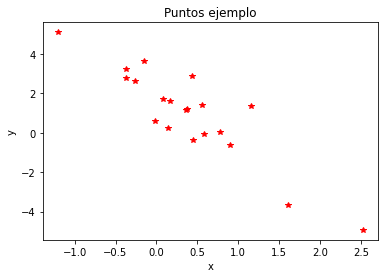

In [4]:
plt.plot(x,y, 'r*')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Puntos ejemplo')
plt.show()

Utilizamos el paquete [cvxpy](https://github.com/cvxgrp/cvxpy) para resolver el problema de mínimos cuadrados:

In [5]:
import cvxpy as cp

```{margin}

Construímos a la matriz $A$.

```

In [6]:
A=np.ones((mpoints,2)) #step 1 to build matrix A
A[:,1] = x #step 2 to build matrix A

```{margin}

Definición de variables y función objetivo: $\frac{1}{2}\beta^TA^TA\beta - \beta^TA^Ty + \frac{1}{2}y^Ty$.

```

In [7]:
n = 2 # number of variables
beta = cp.Variable(n) #optimization variable
fo_cvxpy = (1/2)*cp.quad_form(beta, A.T@A) - cp.sum(cp.multiply(A.T@y, beta)) + 1/2*y.dot(y) #objective function

In [8]:
prob = cp.Problem(cp.Minimize(fo_cvxpy))
print(prob.solve())

10.217738419387963


In [9]:
print("\nThe optimal value is", prob.value)
print("The optimal beta is")
print(beta.value)
print("The norm of the residual is ", cp.norm(A @ beta - y, p=2).value) #also works: cp.norm2(A @ beta - y).value



The optimal value is 10.217738419387963
The optimal beta is
[ 2.03 -2.65]
The norm of the residual is  4.520561562325624


El paquete *CVXPY* ya tiene una función para resolver el problema anterior, ver [least_squares](https://www.cvxpy.org/examples/basic/least_squares.html).

In [10]:
fo_cvxpy = 1/2*cp.sum_squares(A@beta -y)

In [11]:
prob = cp.Problem(cp.Minimize(fo_cvxpy))
print(prob.solve())

10.217738419387944


In [12]:
print("\nThe optimal value is", prob.value)
print("The optimal beta is")
print(beta.value)
print("The norm of the residual is ", cp.norm(A @ beta - y, p=2).value) #also works: cp.norm2(A @ beta - y).value



The optimal value is 10.217738419387944
The optimal beta is
[ 2.03 -2.65]
The norm of the residual is  4.520561562325624


## El problema de clasificación en dos clases $\mathcal{C}_0, \mathcal{C}_1$ 

Sean $\mathcal{C}_0 , \mathcal{C}_1$ dos clases ajenas y $x \in \mathbb{R}^n$. El problema de clasificación consiste en clasificar al vector $x$ en alguna de las dos clases anteriores de modo que se minimice el error de clasificación.


Ejemplos de lo anterior los encontramos en medicina (persona enferma o no dada una serie de mediciones en sangre), finanzas (persona sujeta a un crédito bancario o no dado un historial crediticio) o clasificación de textos (*spam* o no *spam*).


## Regresión logística: clasificación en $\mathcal{C}_0, \mathcal{C}_1$ 

El modelo por regresión logística tiene por objetivo **modelar las probabilidades de pertenencia a cada una de las clases** $\mathcal{C}_0, \mathcal{C}_1$ dado el vector de *features* o atributos $x \in \mathbb{R}^n$: $p(\mathcal{C}_0|x) , p(\mathcal{C}_1|x)$.

En la regresión logística se utiliza la función **[sigmoide](https://en.wikipedia.org/wiki/Sigmoid_function)** $\sigma:\mathbb{R} \rightarrow \mathbb{R}$:

$$\sigma(t)=\frac{1}{1+\exp(-t)}$$

para modelar ambas probabilidades ya que mapea todo el eje real al intervalo $[0,1]$. Además resulta ser una aproximación continua y diferenciable a la función de **[Heaviside](https://en.wikipedia.org/wiki/Heaviside_step_function)** $H:\mathbb{R} \rightarrow \mathbb{R}$

$$H(t) = 
\begin{cases}
1 & \text{si } t \geq 0,\\
0 & \text{si } t <0\\
\end{cases}
$$



In [13]:
mpoints = 100
t = np.linspace(-10, 10, mpoints)
Heaviside = 1*(t>0)

In [14]:
import matplotlib.pyplot as plt

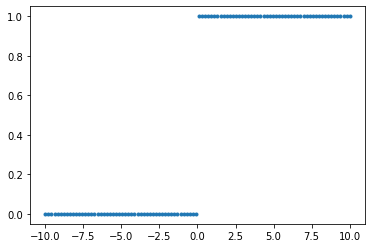

In [15]:
plt.plot(t, Heaviside, '.')
plt.show()

A continuación graficamos a la sigmoide $\sigma(ht)$ para distintos valores de $h \in \{-3, -1, -1/2, 1/2, 1, 3\}$:

In [16]:
sigmoid = lambda t_value: 1/(1+np.exp(-t_value))

In [17]:
h = np.array([-3, -1, -1/2, 1/2, 1, 3])
n = len(h)
sigmoids = np.zeros((mpoints, n))
for i in range(len(h)):
    sigmoids[:,i] = sigmoid(h[i]*t)

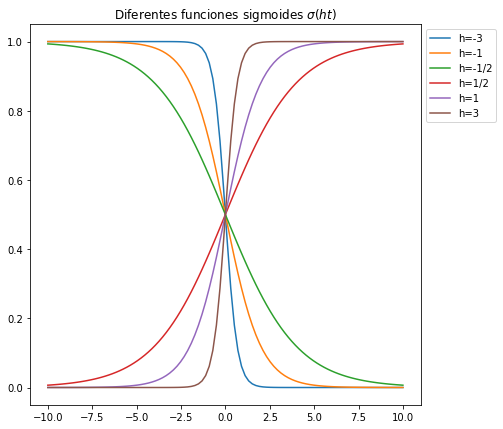

In [18]:
plt.figure(figsize=(7,7))
plt.plot(t, sigmoids[:,0],
         t, sigmoids[:,1],
         t, sigmoids[:,2],
         t, sigmoids[:,3],
         t, sigmoids[:,4],
         t, sigmoids[:,5])
l = ["h=-3", "h=-1", "h=-1/2", "h=1/2", "h=1", "h=3"]
plt.legend(l, bbox_to_anchor=(1,1))
plt.title("Diferentes funciones sigmoides $\sigma(ht)$")
plt.show()

Obsérvese la forma de cada curva al variar $h$ en la función $\sigma(ht)$. Una regla de clasificación podría ser clasificar como perteneciente a $\mathcal{C}_0$ si la probabilidad (modelada por la curva sigmoide) es menor a $0.25$ (**punto de corte**) y perteneciente a $\mathcal{C}_1$ si es mayor o igual a $0.25$. Para diferentes curvas sigmoides presentadas en la gráfica anterior obsérvese que al fijar el punto de corte y tomar un valor de $t$ en el eje horizontal, la pertenencia a alguna de las clases es menos sensible al variar $t$ que en otras curvas.



Así, la función sigmoide permite modelar la probabilidad de pertenencia a la clase $\mathcal{C}_1:$

$$p(\mathcal{C}_1| x)=\sigma(a)$$

para alguna $a \in \mathbb{R}$.

Con el [teorema de Bayes](https://en.wikipedia.org/wiki/Bayes%27_theorem) se obtiene el valor de $a$:

$$
\begin{eqnarray}
p(\mathcal{C}_1|x) &=& \frac{p(x|\mathcal{C}_1)p(\mathcal{C}_1)}{p(x|\mathcal{C}_0)p(\mathcal{C}_0)+p(x|\mathcal{C}_1)p(\mathcal{C}_1)} \nonumber \\
&=& \left ( 1+ \frac{p(x|\mathcal{C}_0)p(\mathcal{C}_0)}{p(x|\mathcal{C}_1)p(\mathcal{C}_1)} \right )^{-1} \nonumber
\end{eqnarray}
$$

Por lo tanto:

$$
\begin{eqnarray}
a(x)&=&\log\left( \frac{p(x|\mathcal{C}_1)p(\mathcal{C}_1)}{p(x|\mathcal{C}_0)p(\mathcal{C}_0)} \right ) \nonumber
\end{eqnarray}
$$

```{admonition} Comentarios

* Algunas propiedades que tiene la función $\sigma(\cdot)$ se encuentran:

$$
\begin{eqnarray}
\sigma (-t)&=&1-\sigma (t) \nonumber \\
\frac{d\sigma (t)}{dt}&=&\sigma (t)(1-\sigma (t)) \nonumber
\end{eqnarray}
$$

* En Estadística a la función:

$$a=\log\left(\frac{\sigma}{1-\sigma}\right)$$

se le conoce como [**logit**](https://en.wikipedia.org/wiki/Logit) y modela el log momio:

$$\log \left(\frac{p(\mathcal{C}_1|x)}{p(\mathcal{C}_0|x)}\right)=\log \left(\frac{p(\mathcal{C}_1|x)}{1-p(\mathcal{C}_1|x)}\right)$$

que tiene una interpretación directa en términos de las probabilidades de pertenencia a cada clase $\mathcal{C}_0,\mathcal{C}_1$.

```

### Modelo en regresión logística de dos clases

De forma similar como en el modelo por mínimos cuadrados lineales se modeló a la variable respuesta $y$ con una función lineal en sus parámetros, en el modelo en regresión logística **con dos clases e intercepto** se propone una **función lineal** en un vector de parámetros $(\beta_0,\beta) \in \mathbb{R}^{n+1}$ definida por el logit:

$$
\beta^T x+\beta_0=a(x|\beta_0,\beta)=\log \left(\frac{p(\mathcal{C}_1|x)}{p(\mathcal{C}_0|x)}\right).
$$


Obsérvese que si $y$ es considerada como variable respuesta que está en función de $x \in \mathbb{R}^{n+1}$ dado el vector $(\beta_0, \beta)$ se tiene:


$$p(\mathcal{C}_1 | x ) = y(x | \beta_0, \beta) = \frac{1}{1+ e^{-(\beta_0, \beta)^T x}}$$

que se lee "la probabilidad de pertenencia a la clase $\mathcal{C}_1$ dado el vector de atributos $x$ es igual a $y$".


```{admonition} Comentarios


* El modelo con $2$ parámetros $\beta_0, \beta_1$ se ve como:

$$p(\mathcal{C}_1 | x ) = y(x | \beta_0, \beta) = \frac{1}{1+ e^{-(\beta_0 + \beta_1x)}}$$


con $x \in \mathbb{R}$.

* El modelo puede extenderse utilizando $n+1$ funciones conocidas $\phi_j:\mathbb{R} \rightarrow \mathbb{R}$, $\phi_j(x)$ $j=0,\dots, n$ por lo que si $\phi(x)=(\phi_0(x),\phi_1(x),\dots,\phi_n(x))^T$ y $\beta_0 \in \mathbb{R}$, $\beta \in \mathbb{R}^n$, entonces se tiene el modelo por regresión logística:

$$
p(\mathcal{C}_1|\phi(x))=y(x|\beta_0, \beta)= \frac{1}{1+ e^{-(\beta_0, \beta)^T \phi(x)}}
$$

* La notación $y(x | \beta_0, \beta)$ se utiliza para denotar que $(\beta_0, \beta)$ es un vector de parámetros a estimar, en específico $\beta_0, \beta_1, \dots, \beta_n$, esto es: $n+1$ parámetros a estimar.

* La variable de optimización es $(\beta_0, \beta) \in \mathbb{R}^{n+1}$.

```

### ¿Cómo se ajustan los parámetros del modelo por regresión logística de dos clases?

Dados $(x_0,\hat{y}_0), \dots (x_m, \hat{y}_m)$ puntos se desean modelar $m+1$ probabilidades de pertenencias a las clases $\mathcal{C}_0, \mathcal{C}_1$ representadas con las etiquetas  $\hat{y}_i \in \{0,1\} \forall i=0,1,\dots, m$. El número $0$ representa a la clase $\mathcal{C}_0$ y el $1$ a la clase $\mathcal{C}_1$. El vector $x_i \in \mathbb{R}^n$ .

Cada probabilidad se modela como $y_0=y_0(x_0|\beta_0, \beta),y_1=y_1(x_1|\beta_0, \beta),\dots,y_m=y_m(x_n|\beta_0, \beta)$ utilizando:

$$p(\mathcal{C}_1|x_i) = y_i(x_i|\beta_0,\beta)  = \frac{1}{1+ e^{-(\beta_0 + \beta^T x)}} \forall i=0,1,\dots,m.$$


Los $n+1$ parámetros $\beta_0, \beta_1, \dots, \beta_n$ se ajustan **maximizando** la [función de verosimilitud](https://en.wikipedia.org/wiki/Likelihood_function):

$$
\mathcal{L}(\beta_0, \beta|x)=\displaystyle \prod_{i=0}^n y_i^{\hat{y}_i}(1-y_i)^{1-\hat{y}_i}
$$

donde: $\hat{y}_i \sim \text{Bernoulli}(y_i)$ y por tanto $\hat{y}_i \in \{0,1\}$: $\hat{y}_i = 1$ con probabilidad $y_i$ y $\hat{y}_i = 0$ con probabilidad $1-y_i$. Entonces se tiene el problema:



$$\displaystyle \max_{(\beta_0, \beta) \in \mathbb{R}^{n+1}} \mathcal{L}(\beta_0, \beta|x)=\displaystyle \prod_{i=0}^n y_i^{\hat{y}_i}(1-y_i)^{1-\hat{y}_i}$$

Lo anterior es equivalente a maximizar la **log-verosimilitud**:

$$
\begin{eqnarray}
\ell(\beta_0, \beta |x)&=&\log(\mathcal{L}(\beta_0, \beta| x)) \nonumber\\
&=&\displaystyle \sum_{i=1}^m \hat{y}_i\log(y_i)+(1-\hat{y}_i)\log(1-y_i) \nonumber\\
&=&\displaystyle \sum_{i=1}^m\hat{y}_i (\beta_0, \beta)^T x_i-\log(1+\exp((\beta_0, \beta)^Tx_i) \nonumber
\end{eqnarray}
$$

o a minimizar la [**devianza**](https://en.wikipedia.org/wiki/Deviance_(statistics)):


$$
\begin{eqnarray}
\displaystyle \min_{(\beta_0, \beta) \in \mathbb{R}^{n+1}}\mathcal{D}(\beta_0, \beta|x)&=&-2\ell(\beta_0, \beta|x) \nonumber \\
&=&2\displaystyle \sum_{i=1}^m\log(1+\exp((\beta_0, \beta)^Tx_i))-\hat{y}_i(\beta_0, \beta)^Tx_i \nonumber
\end{eqnarray}
$$

```{admonition} Comentario


La devianza es una función convexa pues su Hessiana es:

$$
\nabla^2 D(\beta_0, \beta |x) = 2A^TPA
$$

con: $P$ una matriz diagonal con entradas $y_i(1-y_i)$ donde: $y_i$ está en función de $x_i$: $y_i(x_i|\beta_0,\beta) = \frac{1}{1+ e^{-(\beta_0 + \beta^T x_i)}} \forall i=0,1,\dots,m$ y la matriz A es:


$$A = \left[\begin{array}{c}
x_0\\
x_1\\
\vdots\\
x_m
\end{array}
\right]=\left[\begin{array}{cccc}
x_{01} & x_{02}&\dots& x_{0n}\\
x_{11}& x_{12}&\dots& x_{1n}\\
\vdots &\vdots& \vdots&\vdots\\
x_{n1} &x_{n2}&\dots&x_{nn}\\
\vdots &\vdots& \vdots&\vdots\\
x_{m1} &x_{m2}&\dots&x_{mn}
\end{array}
\right] \in \mathbb{R}^{(m+1)x(n+1)}
$$

El valor $m$ representa el número de observaciones y el valor $n$ representa la dimensión del vector $\beta$.


La expresión anterior de la Hessiana se obtiene a partir de la expresión del gradiente:

$$
\nabla D(\beta_0, \beta|x) = 2 \displaystyle \sum_{i=1}^m \left( y_i - \hat{y}_i \right )x_i  = 2\sum_{i=1}^m \left( p(\mathcal{C}_1|x_i) - \hat{y}_i \right )x_i = 2A^T(p-\hat{y})
$$

donde:

$$
p=\left[\begin{array}{c}
y_0(x_0|\beta_0,\beta)\\
y_1(x_1|\beta_0,\beta)\\
\vdots \\
y_m(x_m|\beta_0,\beta)
\end{array}
\right]=
\left[\begin{array}{c}
p(\mathcal{C}_1|x_0)\\
p(\mathcal{C}_1|x_1)\\
\vdots \\
p(\mathcal{C}_1|x_m)
\end{array}
\right] \in \mathbb{R}^{n+1},
\hat{y}=
\left[\begin{array}{c}
\hat{y}_0\\
\hat{y}_1\\
\vdots \\
\hat{y}_m
\end{array}
\right] \in \mathbb{R}^{m+1}
$$

Así, la Hessiana de la devianza es simétrica semidefinida positiva y por tanto es una función convexa.

```

### Ejemplo [Iris *dataset*](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)

Utilizamos el conocido *dataset* de [*Iris*](https://en.wikipedia.org/wiki/Iris_flower_data_set) en el que se muestran **tres especies del género *Iris***. Las especies son: [*I. setosa*](https://en.wikipedia.org/wiki/Iris_setosa), [*I. virginica*](https://en.wikipedia.org/wiki/Iris_virginica) y [*I. versicolor*](https://en.wikipedia.org/wiki/Iris_versicolor):


<img src="https://dl.dropboxusercontent.com/s/1bvsv79h0h64ijv/iris_dataset_flowers.png?dl=0" heigth="400" width="400">

Imagen obtenida de [Iris Dataset](https://rpubs.com/AjinkyaUC/Iris_DataSet).

In [19]:
!pip3 install --quiet sklearn

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [20]:
from sklearn import datasets

In [21]:
iris = datasets.load_iris()

In [22]:
data_iris = iris["data"]

In [23]:
print(data_iris[0:10, 0:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [24]:
m,n = data_iris.shape
print("número de observaciones:%d, número de atributos: %d" % (m,n))

número de observaciones:150, número de atributos: 4


Columnas en este orden: `Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`

In [25]:
print(iris["target_names"])

['setosa' 'versicolor' 'virginica']


In [26]:
print(np.unique(iris["target"]))

[0 1 2]


In [27]:
data_iris_setosa_versicolor = data_iris[0:100].copy()

In [28]:
print(np.corrcoef(data_iris_setosa_versicolor, rowvar=False))

[[ 1.   -0.21  0.81  0.79]
 [-0.21  1.   -0.6  -0.57]
 [ 0.81 -0.6   1.    0.98]
 [ 0.79 -0.57  0.98  1.  ]]


In [29]:
classes = iris["target"][0:100].copy()

La clase $\mathcal{C}_0$ es `setosa` y $\mathcal{C}_1$ es `versicolor` codificadas como $0, 1$ respectivamente.

La función objetivo como se revisó en la sección anterior está dada por la expresión de la devianza:

$$\mathcal{D}(\beta_0, \beta|x)=-2\ell(\beta_0, \beta|x) = 2\displaystyle \sum_{i=1}^m\log(1+\exp((\beta_0, \beta)^Tx_i))-\hat{y}_i(\beta_0, \beta)^Tx_i$$

donde: $\hat{y}_i \in \{0,1\}$, $x_i$ $i$-ésimo renglón de matriz $A \in \mathbb{R}^{100 \times 4}$.

**Añadimos la columna que indica uso de intercepto y por tanto de un modelo con $\beta_0$:**

In [30]:
m,n = data_iris_setosa_versicolor.shape

In [31]:
data_iris_setosa_versicolor = np.column_stack((np.ones((m,1)), data_iris_setosa_versicolor))

In [32]:
data_iris_setosa_versicolor[0:10, 0:10]

array([[1. , 5.1, 3.5, 1.4, 0.2],
       [1. , 4.9, 3. , 1.4, 0.2],
       [1. , 4.7, 3.2, 1.3, 0.2],
       [1. , 4.6, 3.1, 1.5, 0.2],
       [1. , 5. , 3.6, 1.4, 0.2],
       [1. , 5.4, 3.9, 1.7, 0.4],
       [1. , 4.6, 3.4, 1.4, 0.3],
       [1. , 5. , 3.4, 1.5, 0.2],
       [1. , 4.4, 2.9, 1.4, 0.2],
       [1. , 4.9, 3.1, 1.5, 0.1]])

**Función objetivo:**

$$2\displaystyle \sum_{i=1}^m\log(1+\exp((\beta_0, \beta)^Tx_i))-\hat{y}_i(\beta_0, \beta)^Tx_i$$

```{margin}

Ver [cvxpy: logistic regression](https://www.cvxpy.org/examples/machine_learning/logistic_regression.html)

```

In [33]:
n = n+1 #number of variables
beta = cp.Variable(n) #optimization variable
fo_cvxpy = 2*cp.sum(
             cp.logistic(data_iris_setosa_versicolor @ beta) - cp.multiply(classes, data_iris_setosa_versicolor @ beta)
                   )

In [34]:
prob = cp.Problem(cp.Minimize(fo_cvxpy))
print(prob.solve())

5.393472364509651e-06


In [35]:
print("\nThe optimal value is", prob.value)
print("The optimal beta is")
print(beta.value)



The optimal value is 5.393472364509651e-06
The optimal beta is
[  9.71  -3.97 -13.53  11.16  25.52]


### Cálculo de probabilidades de pertenencia a las clases $\mathcal{C}_0 :$ `setosa`, $\mathcal{C}_1 :$ `versicolor`

**Para individuo $i$ se tiene:**

$$p(\mathcal{C}_1|x_i) = y_i(x_i|\beta_0,\beta)  = \frac{1}{1+ e^{-(\beta_0 + \beta^T x_i)}} \forall i=0,1,\dots,m.$$


Por ejemplo, para el renglón $1$ de `data_iris_setosa_versicolor`, que sabemos que pertenece a la clase $\mathcal{C}_0$: `setosa`:

**Estimación de la probabilidad de pertenencia a la clase $\mathcal{C}_1$, `versicolor`**:


In [37]:
linear_value = -data_iris_setosa_versicolor[0,:].dot(beta.value)

In [38]:
print(1/(1+np.exp(linear_value)))

7.086267696762456e-17

**Estimación de la probabilidad de pertenencia a la clase $\mathcal{C}_0$, `setosa`**:


In [39]:
print(np.exp(linear_value) / (1+np.exp(linear_value)))

1.0

Por ejemplo, para el último renglón de `data_iris_setosa_versicolor`, que sabemos que pertenece a la clase $\mathcal{C}_1$, `versicolor`:

**Estimación de la probabilidad de pertenencia a la clase $\mathcal{C}_1$, `versicolor`**:


In [86]:
linear_value = -data_iris_setosa_versicolor[m-1,:].dot(beta.value)

In [87]:
print(1/(1+np.exp(linear_value)))

0.9999999999999862

**Estimación de la probabilidad de pertenencia a la clase $\mathcal{C}_0$, `setosa`**:


In [88]:
print(np.exp(linear_value) / (1+np.exp(linear_value)))

1.3686485842010746e-14

## Introducción a *Constrained Inequality and Equality Optimization* (CIEO)

Recuérdese que para *Unconstrained Optimization* (UO) se dieron **condiciones** que deben satisfacer puntos para ser óptimos en {ref}`sobre problemas de optimización <SPOPT>`. En esta sección se darán ejemplos que ayudarán a describir condiciones que caracterizan las soluciones para un **problema estándar de optimización**:

$$\displaystyle \min f_o(x)$$

$$\text{sujeto a:}$$

$$f_i(x) \leq 0, \quad \forall i=1,\dots,m$$

$$h_i(x) = 0, \quad \forall i=1,\dots,p$$

con $f_i: \mathbb{R}^n \rightarrow \mathbb{R}$ $\forall i=0,\dots,m$, $h_i: \mathbb{R}^n \rightarrow \mathbb{R}$, $\forall i=1,\dots,p$. $f_i$ son las **restricciones de desigualdad**, $h_i$ son las **restricciones de igualdad**.


```{admonition} Definición

El problema anterior se le nombra **problema primal**.

```

En lo que continúa se asume que $f_i$, $h_i$ son funciones de clase $\mathcal{C}^2$ en sus dominios respectivos.

### Ejemplo 1

Considérese el siguiente problema de optimización:

$$\min x_1 + x_2$$

$$\text{sujeto a:}$$

$$x_1^2 + x_2^2 -2 = 0$$

En el cual:

$$
\nabla f_o(x) = 
\left [
\begin{array}{c}
1 \\
1
\end{array}
\right ],
\nabla f_1(x) =
\left [
\begin{array}{c}
2x_1 \\
2x_2
\end{array}
\right ]
$$

de modo que al evaluar en diferentes puntos los gradientes anteriores se tiene una situación siguiente:

<img src="https://dl.dropboxusercontent.com/s/kk0nbwa7lq4bk5d/ej1_CIEO_problems.png?dl=0" heigth="500" width="500">

Por el dibujo anterior se tiene que el conjunto de factibilidad para este problema es una circunferencia de radio $\sqrt{2}$ con centro en el origen. Se puede observar además que $x^* = (-1, -1)^T$ pues si estuviéramos en cualquier otro punto, por ejemplo en el punto $x = (\sqrt{2}, 0)^T$ entonces cualquier movimiento en dirección con sentido de las manecillas del reloj reducirá el valor de $f_o$.

También se observa en el dibujo anterior que en la solución $x^*$, se cumple que:

$$\nabla f_o(x^*) = - \nu_1^*\nabla f_1(x^*),$$



esto es, son paralelos, de hecho, $\nu_1^* = \frac{1}{2}$.

```{margin}

Recuérdese que si $x$ es factible entonces $f_1(x) = 0$ y si  $\nabla f_o(x) \neq 0$ entonces no es óptimo.

```

Usando el teorema de Taylor aplicado a $f_1$ y asumiendo que $x$ es un punto factible, $\nabla f_o(x) \neq 0$ y $\Delta x$ una dirección de descenso de longitud pequeña tal que mantiene factibilidad se tiene que:

$$0 = f_1(x + \Delta x) \approx f_1(x) + \nabla f_1(x)^T \Delta x = \nabla f_1(x)^T \Delta x.$$

En resúmen, si el paso $\Delta x$ mantiene la factibilidad entonces:

$$\nabla f_1(x)^T \Delta x = 0.$$ 

Además, como es dirección de descenso:

$$\nabla f_o (x)^T \Delta x < 0.$$

Si $x$ no es mínimo local entonces existe tal dirección $\Delta x$, análogamente si no existe tal dirección entonces $x$ es un mínimo local. En el dibujo anterior se verifica visualmente esto pues si ambos gradientes no son paralelos entonces podemos elegir una dirección de descenso que satisfaga ambas condiciones anteriores.

```{admonition} Observación
:class: tip

Obsérvese que si $x^*$ es mínimo local entonces $\nabla f(x^*) = 0$ (condición necesaria de primer orden) por lo que no existen direcciones de descenso.

```

### La función Lagrangiana

```{admonition} Definición

La **función Lagrangiana** asociada al problema de optimización (primal) se define como: 

$$\mathcal{L}: \mathbb{R}^n \times \mathbb{R}^m \times \mathbb{R}^p \rightarrow \mathbb{R}$$

con:

$$\mathcal{L}(x, \lambda , \nu) = f_o(x) + \displaystyle \sum_{i=1}^m \lambda_i f_i(x) + \sum_{i=1}^p \nu_i h_i(x)$$

y $\text{dom} \mathcal{L} = \mathcal{D} \times \mathbb{R}^m \times \mathbb{R}^p$ donde: $\mathcal{D}$ es el dominio del problema de optimización. 

En lo que continúa se asume la restricción $\lambda_i \geq 0 \forall i=1,\dots, m$.

```

```{admonition} Comentarios

* $\lambda _i$ se le nombra **multiplicador de Lagrange** asociado con la $i$-ésima restricción de desigualdad $f_i(x) \leq 0$. 

* $\nu_i$ se le nombra **multiplicador de Lagrange** asociado con la $i$-ésima restricción de igualdad $h_i(x)=0$.

* Los vectores $\lambda = (\lambda_i)_{i=1}^m$ y  $\nu = (\nu_i)_{i=1}^p \in \mathbb{R}^p$ se les nombran **variables duales** o **vectores de multiplicadores de Lagrange** asociados con el problema de optimización. El vector $x \in \mathcal{D}$ se le nombra **variable primal**.

```

Para el ejemplo anterior se tiene:

$$\mathcal{L}(x, \lambda_1) = f(x) + \nu_1 f_1(x).$$

Obsérvese que $\nabla_x \mathcal{L}(x, \nu_1) = \nabla f(x) + \nu_1 f_1(x)$ y en la solución $x^*$, existe $\nu_1^*$ tal que $\nabla_x \mathcal{L} (x^*, \nu_1^*)= 0$.

```{admonition} Observación
:class: tip

La notación $\nabla_x f(x, y)$ hace referencia al gradiente de $f(x,y)$ sólo derivando respecto a $x$.

```

```{admonition} Comentario

Aunque la condición 

$$\nabla f_o(x^*) = - \nu_1^*\nabla f_1(x^*)$$

es necesaria, ésta no es suficiente pues se satisface en el punto $(1,1)^T$ para el ejemplo anterior con $\nu_1 = -\frac{1}{2}$ pero este punto **maximiza** $f_o$ en la circunferencia. Y no se puede satisfacer suficiencia simplemente colocando una restricción sobre el signo de $\nu_1$ pues si por ejemplo se pide que $\nu_1 < 0$ y consideramos la restricción $2-x_1^2-x_2^2=0$, la solución **sigue** siendo $(-1, -1)^T$ pero $\nu_1^*=-\frac{1}{2}$.

```

### Ejemplo 2

$$\min x_1 + x_2$$

$$\text{sujeto a:}$$

$$x_1^2 + x_2^2 -2 \leq 0$$

Para este ejemplo el conjunto de factibilidad es el interior y frontera del círculo:

<img src="https://dl.dropboxusercontent.com/s/bsdo84p22y9qgg7/ej2a_CIEO_problems.png?dl=0" heigth="350" width="350">


Obsérvese en el dibujo anterior que $-\nabla f_1(x)$ apunta al interior del conjunto de factibilidad.

La solución de este problema sigue siendo $(-1, -1)^T$ con $\lambda_1^* = \frac{1}{2}$ al igual que en el ejemplo 1 con $x_1^2 + x_2^2 -2 = 0$. Sin embargo, la diferencia con el ejemplo anterior es que el signo $\lambda_1$ es importante como se describirá a continuación.


Si $x$ no es óptimo entonces como en el ejemplo anterior podemos encontrar una dirección $\Delta x$ que satisfaga factibilidad, $f_1(x) \leq 0$, y reduzca $f_o$. 

Usando el teorema de Taylor aplicado a $f_1$ y asumiendo que $x$ es un punto factible, $\nabla f_o(x) \neq 0$ y $\Delta x$ una dirección de descenso de longitud pequeña tal que mantiene factibilidad se tiene que:

```{margin}

Recuérdese que si $x$ es factible entonces $f_1(x) \leq 0$ y si  $\nabla f_o(x) \neq 0$ entonces no es óptimo.

```

$$f_1(x) + \nabla f_1(x)^T \Delta x \approx f_1(x + \Delta x) \leq 0$$

En resúmen, si el paso $\Delta x$ mantiene la factibilidad entonces:

$$f_1(x) + \nabla f_1(x)^T \Delta x \leq 0.$$ 

Además, como es dirección de descenso:

$$\nabla f_o (x)^T \Delta x < 0.$$

```{margin}

Recuérdese que una restricción de desigualdad $f_1$ es activa en $x$ si $f_1(x) = 0$ e inactiva en $x$ si $f_1(x) < 0$.

```

Tenemos que analizar dos casos dependiendo si $f_1$ es o no aciva en $x$ para la desigualdad $f_1(x) + \nabla f_1(x)^T \Delta x  \leq 0$:

**Caso $f_1$ inactiva en $x$: $f_1(x) < 0$,** entonces $x$ está dentro del círculo:


<img src="https://dl.dropboxusercontent.com/s/gmqje4tlp7qnkll/ej2b_CIEO_problems.png?dl=0" heigth="300" width="300">


En este caso **cualquier** dirección $\Delta x$ cuya longitud sea suficientemente pequeña satisface $f_1(x) + \nabla f_1(x)^T \Delta x < 0$ si $\nabla f_o(x) \neq 0$ (por ejemplo tómese $\Delta x$ como $-\nabla f_o(x)$ normalizado y suficientemente pequeño). Si $x$ es mínimo entonces $\nabla f(x) = 0$ y no existe dirección de descenso.

**Caso $f_1$ activa en $x$: $f_1(x) = 0$,** entonces $x$ está en la frontera del círculo:


<img src="https://dl.dropboxusercontent.com/s/4vb2p814hzkaaz0/ej2c_CIEO_problems.png?dl=0" heigth="300" width="300">


La condición que se debe satisfacer es:

$$f_1(x) + \nabla f_1(x)^T \Delta x  = \nabla f_1(x)^T \Delta x  \leq 0.$$ 



la cual junto con la de descenso: $\nabla f_o(x) ^T \Delta x < 0$ definen un semi-espacio cerrado y uno abierto respectivamente:

<img src="https://dl.dropboxusercontent.com/s/u0c913adjj7et36/ej2d_CIEO_problems.pn?dl=0" heigth="500" width="500">


Si $\nabla f_o(x)$ y $\nabla f_1(x)$ apuntan a la misma dirección entonces la intersección entre estas dos regiones es vacía:

<img src="https://dl.dropboxusercontent.com/s/jabcmqo3ekxcad4/ej2e_CIEO_problems.png?dl=0" heigth="400" width="400">



siendo paralelos $\nabla f_o(x)$ y $\nabla f_1(x)$: $\nabla f_o(x) = -\lambda_1 \nabla f_1(x)$ para algún $\lambda_1 \geq 0$ en la situación que $x$ **sea mínimo**.

En este caso el signo del multiplicador **sí es importante** pues si $\nabla f_o(x) = -\lambda_1 \nabla f_1(x)$  con $\lambda_1 \leq 0$ entonces $\nabla f_o(x)$ y $\nabla f_1(x)$ apuntarían en diferentes direcciones y por tanto el conjunto de direcciones que satisfacen:

$$\nabla f_1(x)^T \Delta x  \leq 0.$$ 

$$\nabla f_o(x) ^T \Delta x < 0$$

construyen un semi-espacio abierto. Esto daría la posibilidad a tener una infinidad de direcciones de descenso:

<img src="https://dl.dropboxusercontent.com/s/7ehkg9zg9vkthp4/ej2f_CIEO_problems.png?dl=0" heigth="400" width="400">



lo cual sería una contradicción para $x$ mínimo pues se tendría $\nabla f_o(x) =0$ por condición necesaria de primer orden y no existiría $\Delta x$ tal que es dirección de descenso.

Ambas condiciones para los casos anteriores se pueden obtener a partir de la función Lagrangiana: 


Si no existe $\Delta x$ en un punto $x^*$ entonces:

$$\nabla_x \mathcal{L}(x^*, \lambda_1^*) = \nabla f(x^*) + \lambda_1^* f_1(x^*) = 0$$



Para la condición $\lambda_1 \geq 0$ requerimos la condición con nombre **condición de complementariedad u holgura complementaria**:

$$\lambda_1^* f_1(x^*) = 0$$

pues obsérvese que el caso en el que $f_1$ es inactiva en $x$ entonces por esta condición $\lambda_1 = 0$ y por tanto $\nabla_x \mathcal{L}(x, \lambda_1) = \nabla f(x) = 0$ que es equivalente a tener la condición $x$ mínimo entonces $\nabla f(x)=0$ en un problema sin restricciones. En el caso que $f_1$ es activa en $x$ entonces $\lambda_1 \neq 0$ pero por los dos dibujos anteriores $\lambda_1 \geq 0$.

```{admonition} Comentario

La condición de holgura complementaria indica que si $\lambda_1$ es positivo entonces $f_1$ es activa:

$$\lambda_1 >0 \implies f_1(x) = 0$$

o bien:

$$f_1(x) <0 \implies \lambda_1 =0$$

```

### Ejemplo 3

$$\min x_1 + x_2$$

$$\text{sujeto a:}$$

$$x_1^2 + x_2^2 -2 \leq 0$$

$$-x_2 \leq 0$$

## Ejemplos CIECO

### Máquina de Soporte Vectorial

## Puntos Interiores

**Referencias:**

1. S. P. Boyd, L. Vandenberghe, Convex Optimization, Cambridge University Press, 2009.

2. J. Dennis, R. B. Schnabel, Numerical Methods for Unconstrained Optimization and Nonlinear Equations, SIAM, 1996.

3. J. Nocedal, S. J. Wright, Numerical Optimization, Springer, 2006.